In [ ]:
### Start of the Project


In [12]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# import decisiontree, knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# metrics
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, accuracy_score
#import classifier algorithm
from xgboost import XGBClassifier

#import preprocessing module
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

from collections import Counter 
from imblearn.over_sampling import SMOTE













In [ ]:
### 1. Load the dataset

In [13]:
# Load files into a pandas dataframe
dfx = pd.read_csv('data/Train.csv')
ss = pd.read_csv('data/SampleSubmission.csv')
variables = pd.read_csv('data/VariableDefinitions.csv')

In [14]:
# Let’s observe the shape of our datasets.
print('train data shape :', dfx.shape)


train data shape : (23524, 13)


In [15]:
# inspect train data
dfx.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [16]:
# Check for missing values
print('missing values:', dfx.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


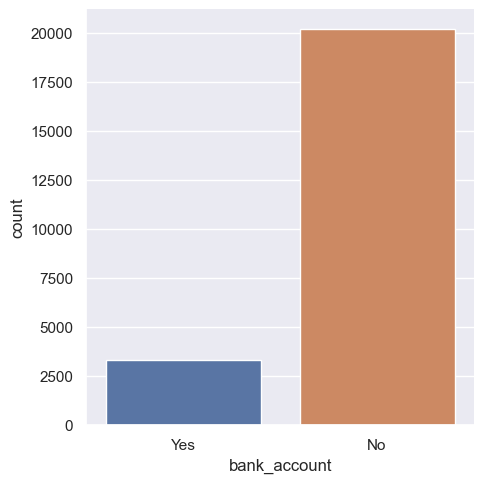

In [17]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=dfx)

In [18]:
# view the submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [8]:
### 2. Understand the dataset

In [19]:
 #show some information about the dataset
 print(dfx.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [20]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
###Analysen

Text(0.5, 1.0, 'relationship between country and household size')

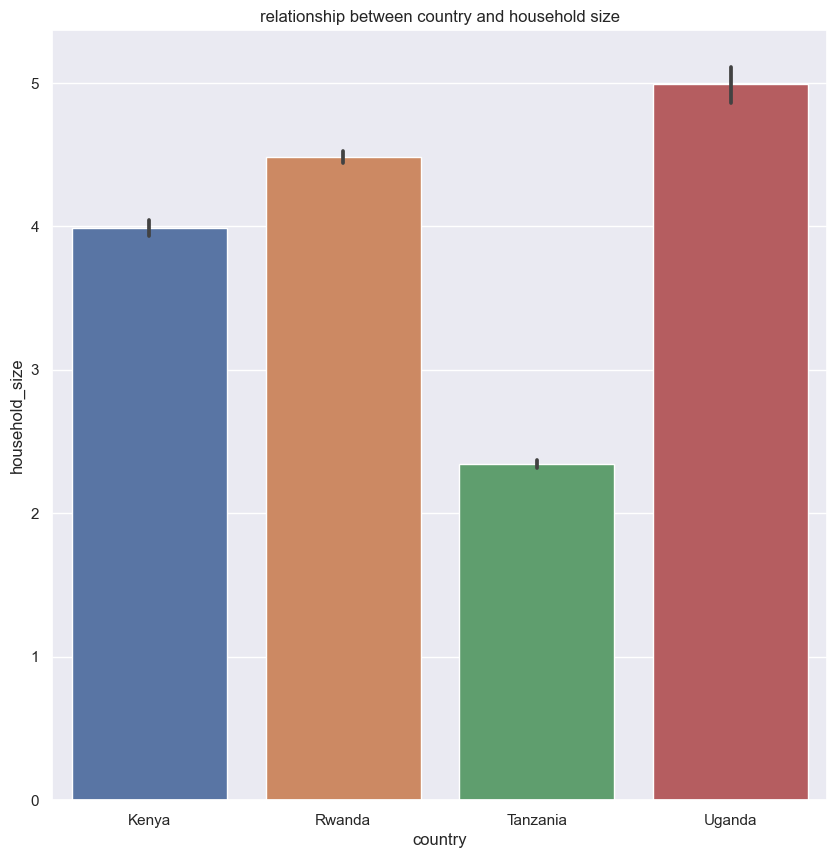

In [22]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x = 'country',y = 'household_size',data = dfx)
plt.title('relationship between country and household size')

Text(0.5, 1.0, 'Level of Education')

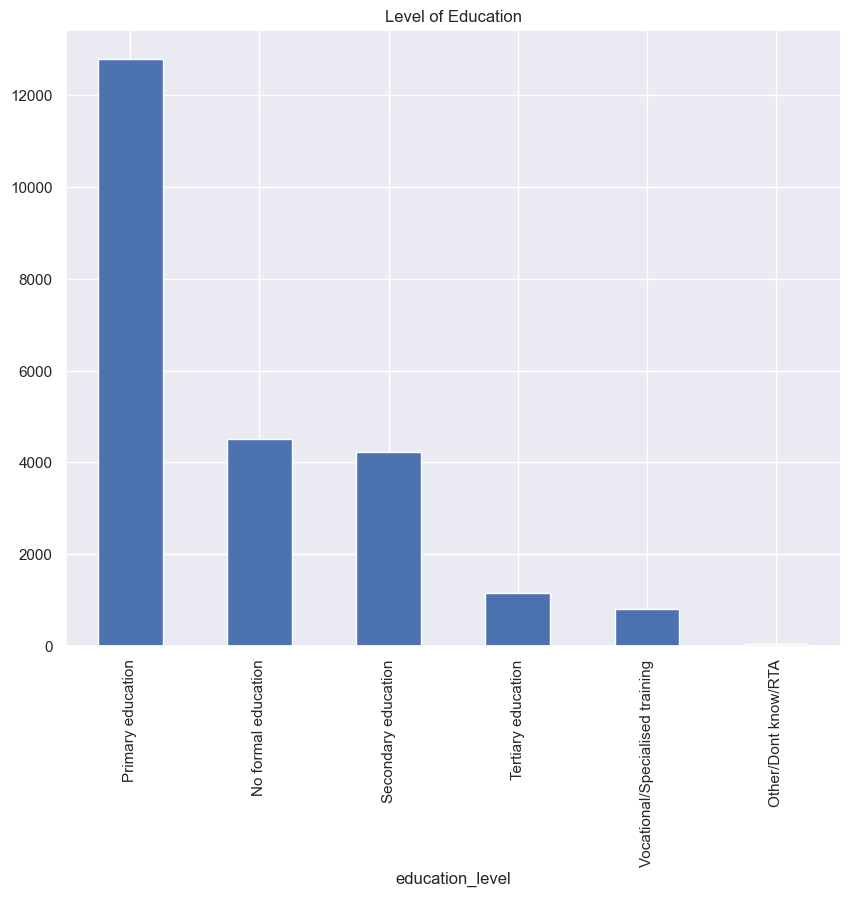

In [23]:
L = dfx['education_level'].value_counts()[:10]
L.plot(kind = 'bar',figsize=(10,8))
plt.title('Level of Education')

Text(0.5, 1.0, 'Interaction between age of respondent and household size')

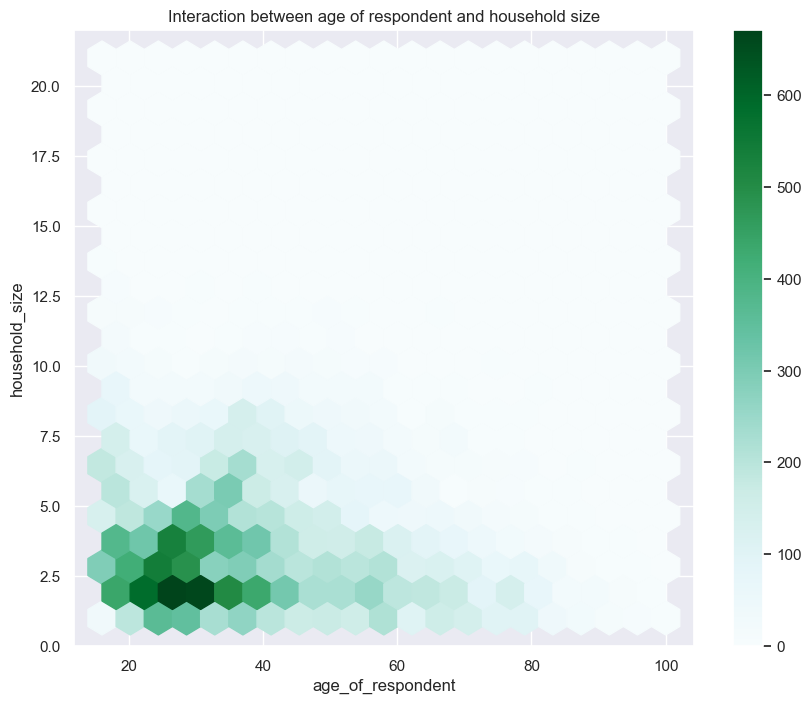

In [24]:
dfx.plot.hexbin(x='age_of_respondent', y='household_size', gridsize=20, figsize=(10,8))
plt.title('Interaction between age of respondent and household size')

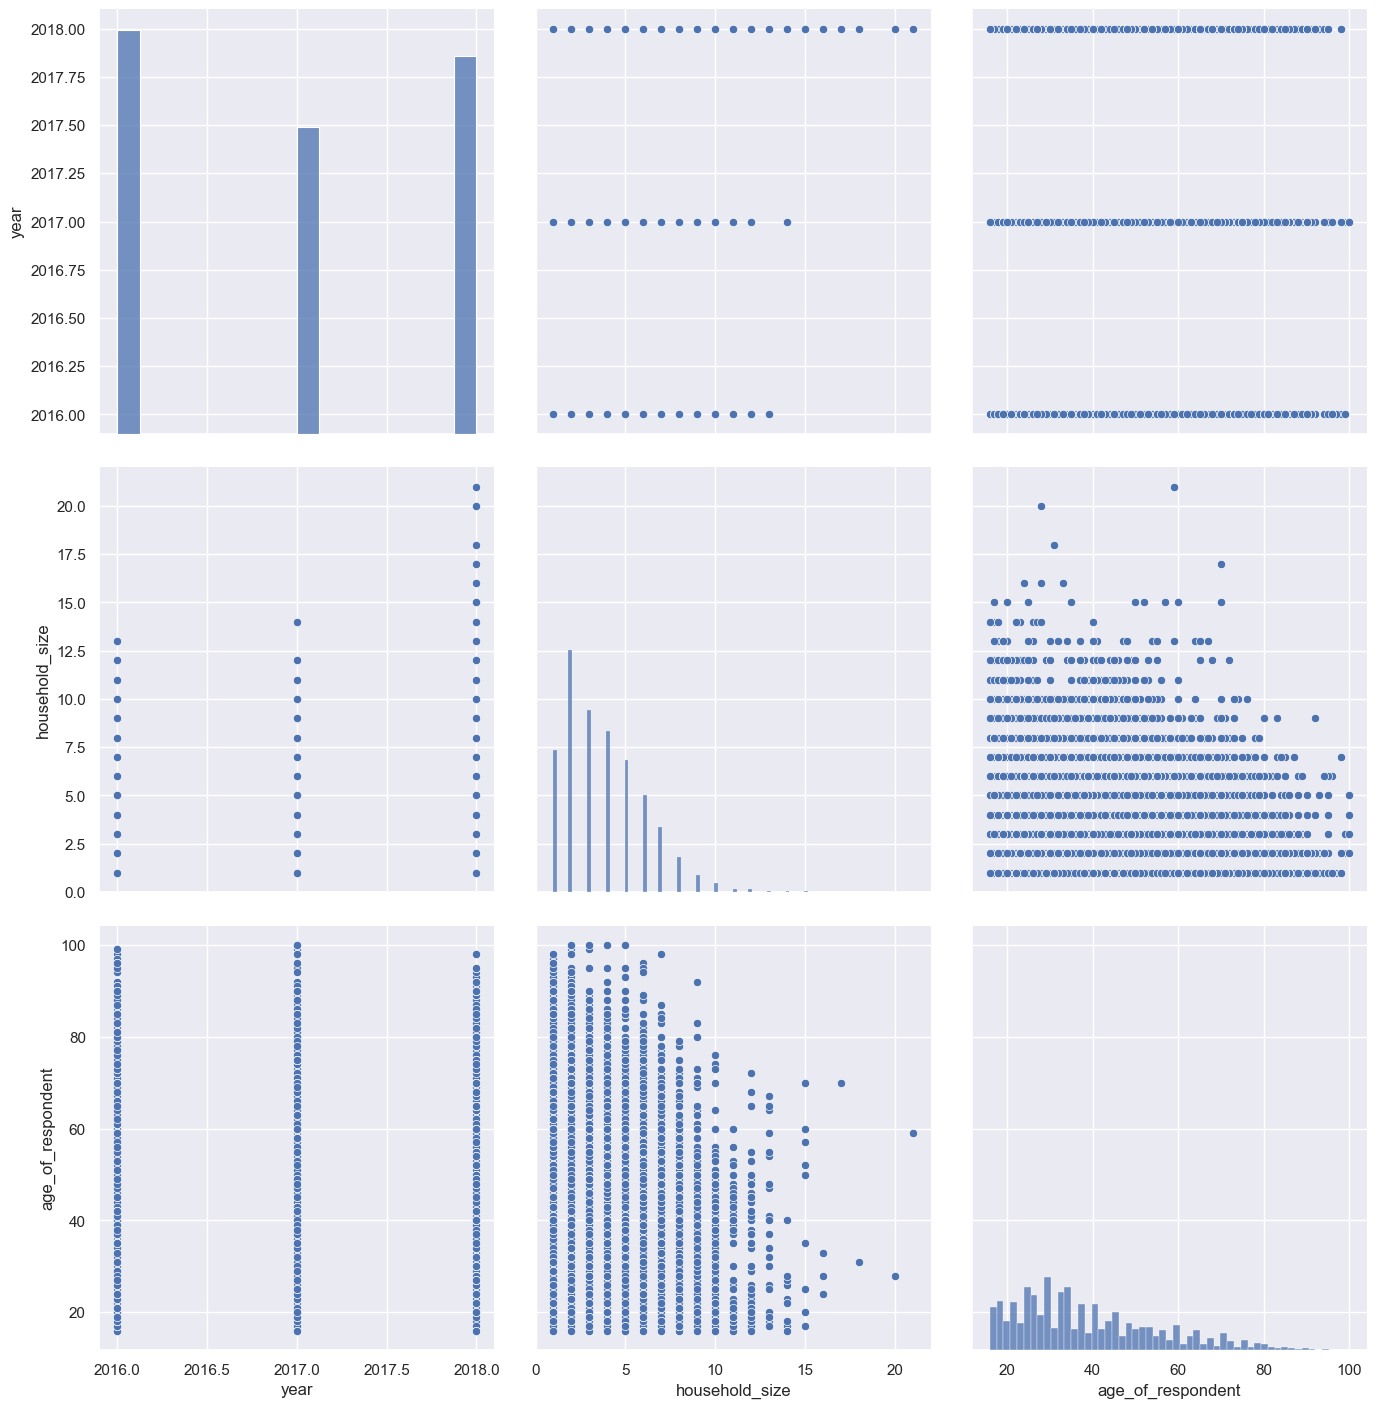

In [25]:
g = sns.pairplot(dfx)
g.fig.set_size_inches(15,15)

In [ ]:
#sns.heatmap(train.corr())
#usemapofafrica

In [26]:
dfx.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


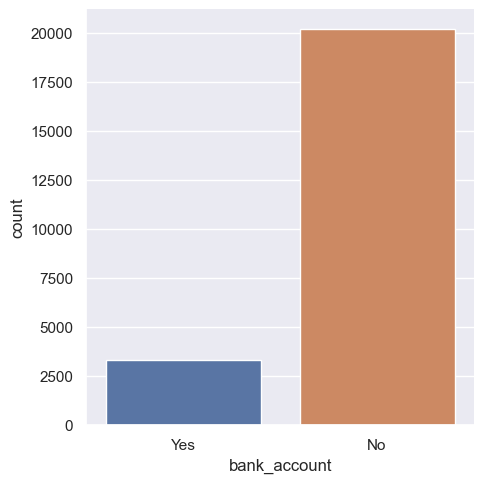

In [27]:

sns.catplot(x="bank_account", kind="count", data=dfx)

<Axes: ylabel='count'>

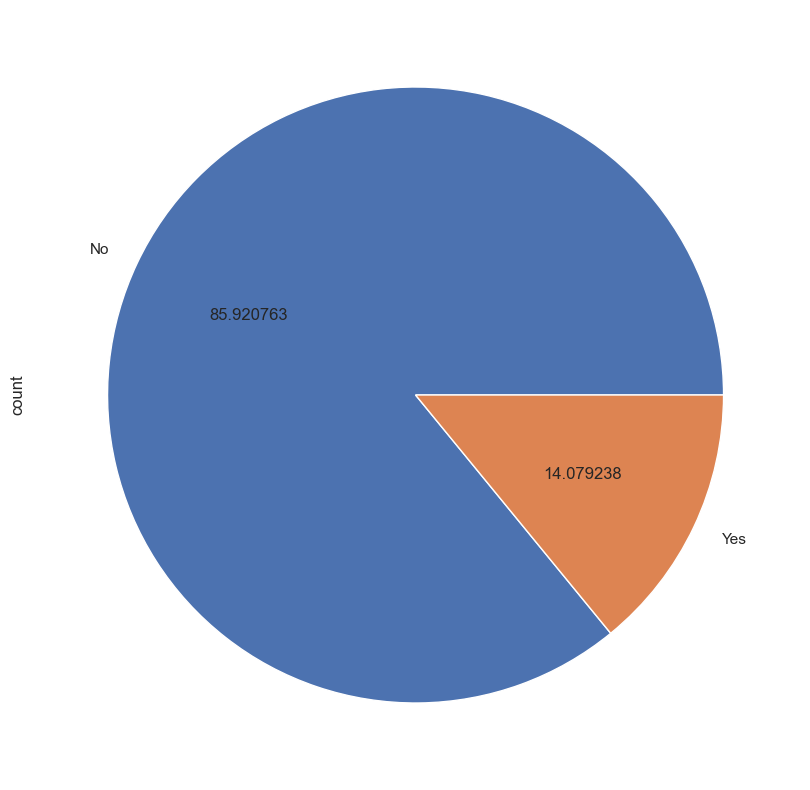

In [28]:
sns.set(rc={'figure.figsize':(10,10)})
dfx['bank_account'].value_counts().plot.pie(autopct = '%2f')

In [ ]:
### 3. Data preparation for machine learning

In [29]:


# Cobvert target label to numerical Data
le = LabelEncoder()
dfx['bank_account'] = le.fit_transform(dfx['bank_account'])

#Separate training features from target
X = dfx.drop(['bank_account'], axis=1)
y = dfx['bank_account']



In [30]:
y.value_counts()

bank_account
0    20212
1     3312
Name: count, dtype: int64

<Axes: ylabel='count'>

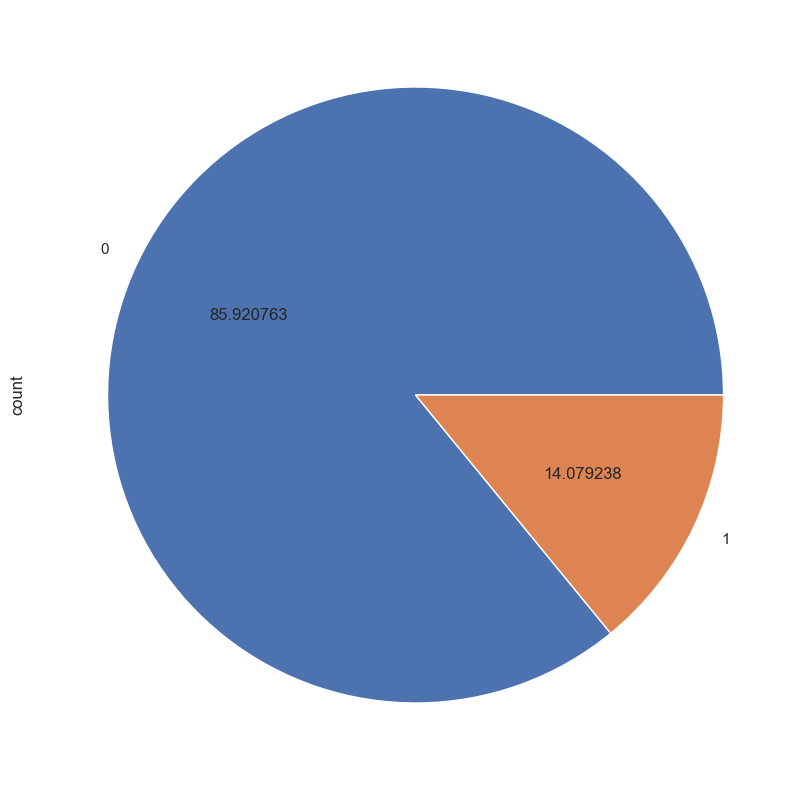

In [31]:
y.value_counts().plot.pie(autopct = '%2f')


In [44]:
# Split train_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split before smote

In [56]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be converted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    
    return data  

In [57]:
# preprocess the train data 
Xp_train = preprocessing_data(X_train)
Xp = preprocessing_data(X_test)




In [58]:
# the first train row
print(Xp_train[:1])

   year  location_type  cellphone_access  household_size  age_of_respondent   
0   1.0            0.0               1.0            0.15           0.142857  \

   gender_of_respondent  relationship_with_head_Child   
0                   0.0                           0.0  \

   relationship_with_head_Head of Household   
0                                       0.0  \

   relationship_with_head_Other non-relatives   
0                                         0.0  \

   relationship_with_head_Other relative  ...  job_type_Government Dependent   
0                                    0.0  ...                            0.0  \

   job_type_Informally employed  job_type_No Income  job_type_Other Income   
0                           1.0                 0.0                    0.0  \

   job_type_Remittance Dependent  job_type_Self employed  country_Kenya   
0                            0.0                     0.0            1.0  \

   country_Rwanda  country_Tanzania  country_Uganda  
0        

In [59]:
# shape of the processed train set
print(Xp_train.shape)

(18819, 37)


In [60]:
# handling the inbalanced data
smote = SMOTE()

#fit predictor and target variable

X_smote, y_smote = smote.fit_resample(Xp_train,y_train)

print('original dataset shape', Counter(y_train))
print('resample dataset shape', Counter(y_smote))


original dataset shape Counter({0: 16169, 1: 2650})
resample dataset shape Counter({0: 16169, 1: 16169})


<Axes: ylabel='count'>

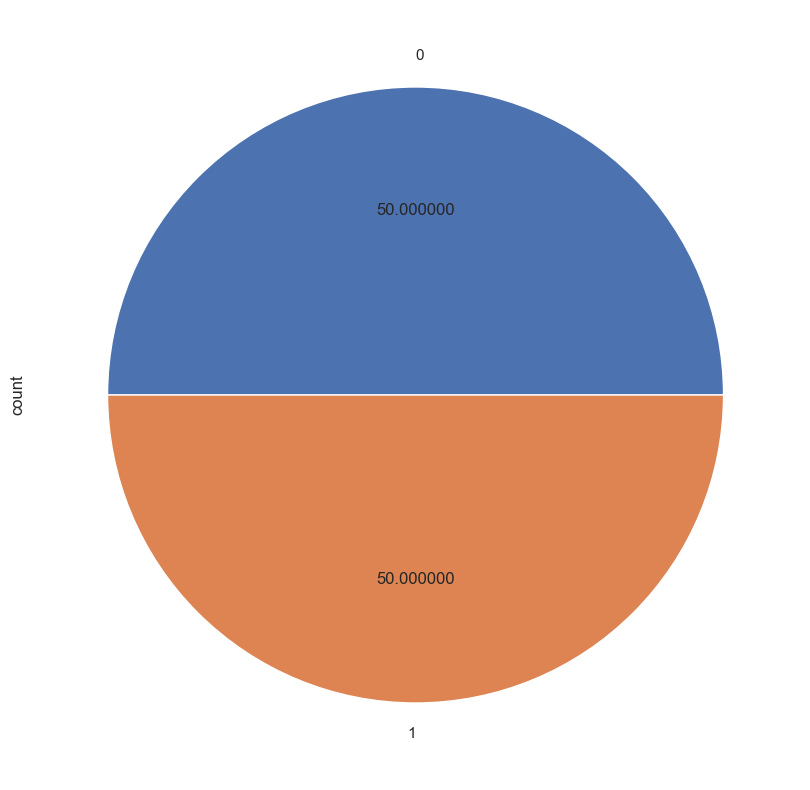

In [61]:
y_smote.value_counts().plot.pie(autopct = '%2f')

In [62]:
rfc = RandomForestClassifier()
rfc.fit(Xp_train, y_train)

# evaluate the model
rfc_pred_train = rfc.predict(Xp_train)

print(classification_report(y_train, rfc_pred_train))



              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16169
           1       0.97      0.88      0.93      2650

    accuracy                           0.98     18819
   macro avg       0.98      0.94      0.96     18819
weighted avg       0.98      0.98      0.98     18819



In [ ]:
#nomeanabsoluterror!

#-> insert error whaterver

In [66]:
#TODO
# classification report for y-test

# Predict the target variable for the test data
rfc_pred_test = rfc.predict(Xp_test)

# Print the classification report for y_test and rfc_pred_test
print(classification_report(y_test, rfc_pred_test))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- cellphone_access_No
- cellphone_access_Yes
- gender_of_respondent_Female
- gender_of_respondent_Male
- location_type_Rural
- ...
Feature names seen at fit time, yet now missing:
- cellphone_access
- gender_of_respondent
- location_type
- marital_status_Dont know


In [67]:

#confusion matrix for random forest clasifier 
rfc_conf_matrix = confusion_matrix(y_train, rfc_pred_train)

# Print the confusion matrix
print("Confusion Matrix:")
print(rfc_conf_matrix)


Confusion Matrix:
[[16107    62]
 [  306  2344]]


In [ ]:
#'?
#add cofusion matrix test -> rfc_conf_matrix_test

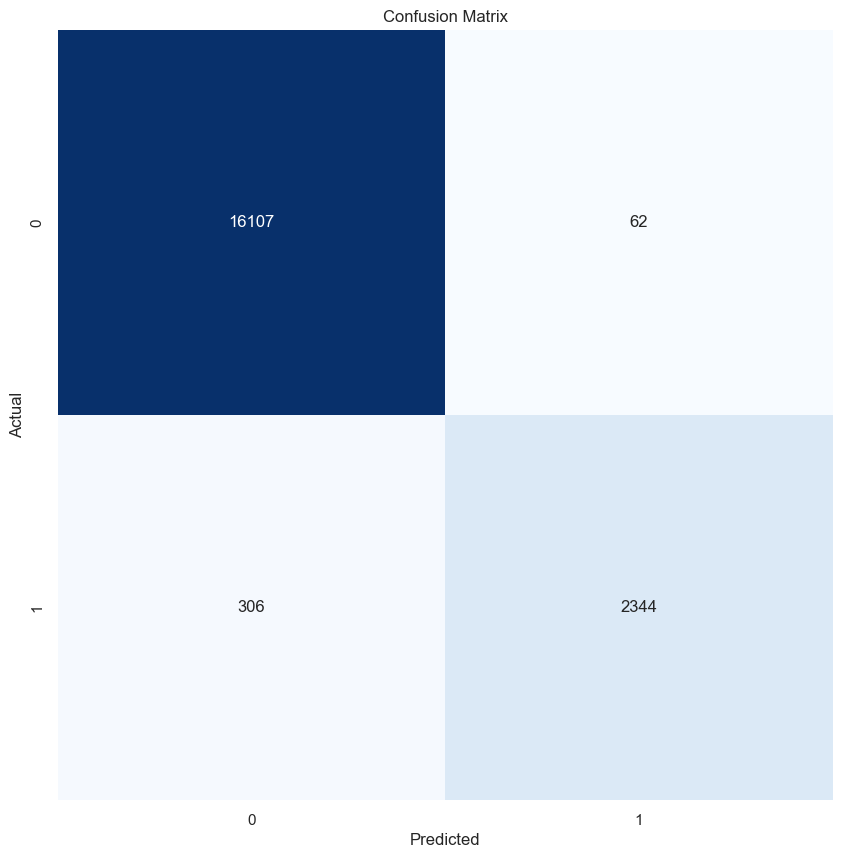

In [69]:
# Plot the confusion matrix as a heatmap
sns.heatmap(rfc_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#maximis truepositiv and minimaze false negativ
# Recall

In [70]:

# Use the same preprocessing code as before
# ...

# Define preprocessing for numerical columns (scale them)
num_cols = ["household_size", "age_of_respondent", "year"]
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define preprocessing for categorical columns (one-hot encode them)
cat_cols = ['year', 'location_type', 'cellphone_access', 'household_size',
       'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing',
       'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', 'job_type_No Income',
       'job_type_Other Income', 'job_type_Remittance Dependent',
       'job_type_Self employed', 'country_Kenya', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda']
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Define the model 
model = RandomForestClassifier()

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the pipeline to train data
#pipeline.fit(X_train, y_train)

# Get predictions on validation data
#y_pred = pipeline.predict(X_test)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters for DecisionTreeClassifier: {'model': DecisionTreeClassifier(), 'model__max_depth': None, 'model__min_samples_split': 2}
Best score for DecisionTreeClassifier: 0.40075471698113213

Best parameters for RandomForestClassifier: {'model': DecisionTreeClassifier(), 'model__max_depth': None, 'model__min_samples_split': 2}
Best score for RandomForestClassifier: 0.40264150943396226

Best parameters for KNeighborsClassifier: {'model': DecisionTreeClassifier(), 'model__max_depth': None, 'model__min_samples_split': 2}
Best score for KNeighborsClassifier: 0.40150943396226413



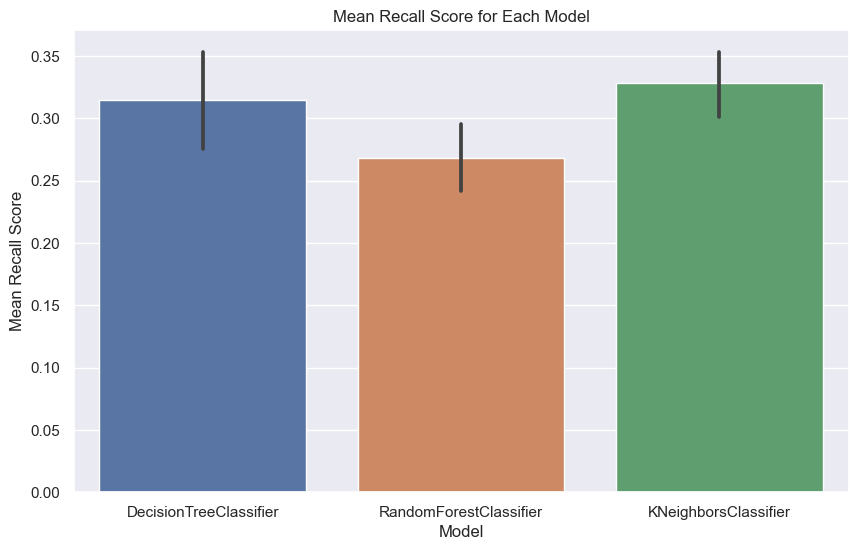

In [78]:
# Define the parameter grid for the models
param_grid = {
    'model': [DecisionTreeClassifier()],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10],
}

param_grid_rf = {
    'model': [RandomForestClassifier()],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10],
}

param_grid_knn = {
    'model': [KNeighborsClassifier()],
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance'],
}

# Define the models
models = [
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# Create an empty DataFrame with columns to store the results
results_df = pd.DataFrame(columns=['Model', 'Params', 'Mean_Test_Score'])

# Loop over the models and perform grid search
for model_name, model in models:
    # Create the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Create a combined parameter grid for the model
    if model_name == 'DecisionTreeClassifier':
        param_grid_combined = [param_grid]
    elif model_name == 'RandomForestClassifier':
        param_grid_combined = [param_grid, param_grid_rf]
    elif model_name == 'KNeighborsClassifier':
        param_grid_combined = [param_grid, param_grid_knn]

    # Create the grid search object
    gscv = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid_combined,
        scoring='recall',
        cv=5,
        n_jobs=-1,
        verbose=1,
        error_score='raise'  # Raise error immediately if a fit fails
    )

    # Fit the grid search object to the data
    gscv.fit(Xp_train, y_train)

    # Get the grid search results as a DataFrame
    model_results = pd.DataFrame(gscv.cv_results_)

    # Add columns for the model name, parameters, and mean test score
    model_results['Model'] = model_name
    model_results['Params'] = model_results['params'].apply(lambda x: str(x))
    model_results['Mean_Test_Score'] = model_results['mean_test_score']

    # Concat the model results to the main results DataFrame
    results_df = pd.concat([results_df, model_results[['Model', 'Params', 'Mean_Test_Score']]])

# Print the best parameters and the best score for each model
for model_name, _ in models:
    best_params = results_df[results_df['Model'] == model_name]['Params'].iloc[0]
    best_score = results_df[results_df['Model'] == model_name]['Mean_Test_Score'].max()
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best score for {model_name}: {best_score}')
    print()

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean_Test_Score', data=results_df)
plt.title('Mean Recall Score for Each Model')
plt.xlabel('Model')
plt.ylabel('Mean Recall Score')
plt.show()


In [84]:
#%timeit gscv.fit(X_train,y_train)

In [87]:
#save result_df to csv
results_df.to_csv('results.csv', index=False)


In [89]:
results_df = pd.read_csv('results.csv')
result_df.head()

NameError: name 'result_df' is not defined

In [80]:
gscv.best_params_
round(gscv.best_score_,6)
best_model = gscv.best_estimator_
best_model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['household_size',
                                                   'age_of_respondent',
                                                   'year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['year', 'location_type',
                                                   'cellphone_access',
                                                   'household_size',
                                                   'age_of_respondent',
                                                   'gender_of_respondent',
                                                   'relations...
                                                   'education_level_Tertiary '
                                                   'education',
                                                   'education_level_Vocational/Specialised '
                                                   'training',
                                                   'job_type_Dont Know/Refuse '
                                                   'to answer',
                                                   'job_type_Farming and '
                                                   'Fishing',
                                                   'job_type_Formally employed '
                                                   'Government',
                                                   'job_type_Formally employed '
                                                   'Private',
                                                   'job_type_Government '
                                                   'Dependent',
                                                   'job_type_Informally '
                                                   'employed',
                                                   'job_type_No Income', ...])])),
                ('model', DecisionTreeClassifier())])

In [83]:
result_df


NameError: name 'result_df' is not defined

In [82]:
result_df.head()

NameError: name 'result_df' is not defined

In [ ]:
# Error analysis

# Model selection and training

In [ ]:
### BIS HIERHIN KLAPPT ALLES

In [ ]:


# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

In [ ]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(xg_model,X_Val, y_val,normalize='true')

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_)        

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

In [ ]:
# Get the predicted result for the test Data
test.bank_account = xgb_model.predict(processed_test)